In [24]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [8]:
df.quality.value_counts(ascending=False)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [9]:
# Function to create a histogram, and a boxplot and scatter plot.
def diagnostic_plots(df, variable,target):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(20, 4))

    # histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], bins=30,color = 'r')
    plt.title('Histogram')


    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    
    
    # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable],color = 'b')
    plt.title('Boxplot')
    
    # barplot
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = df)   
    plt.title('Barplot')
    
    
    plt.show()

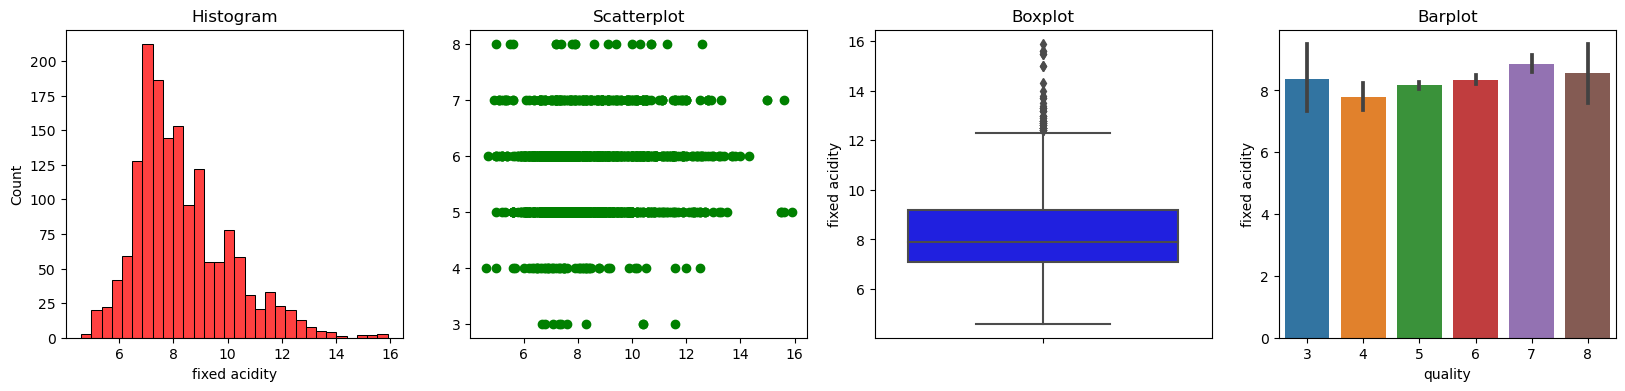

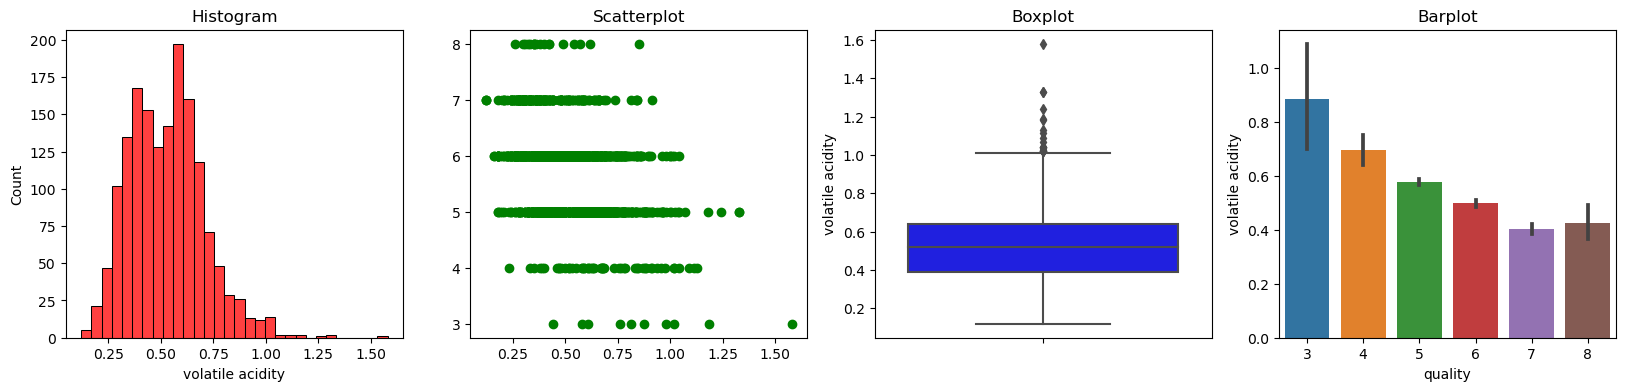

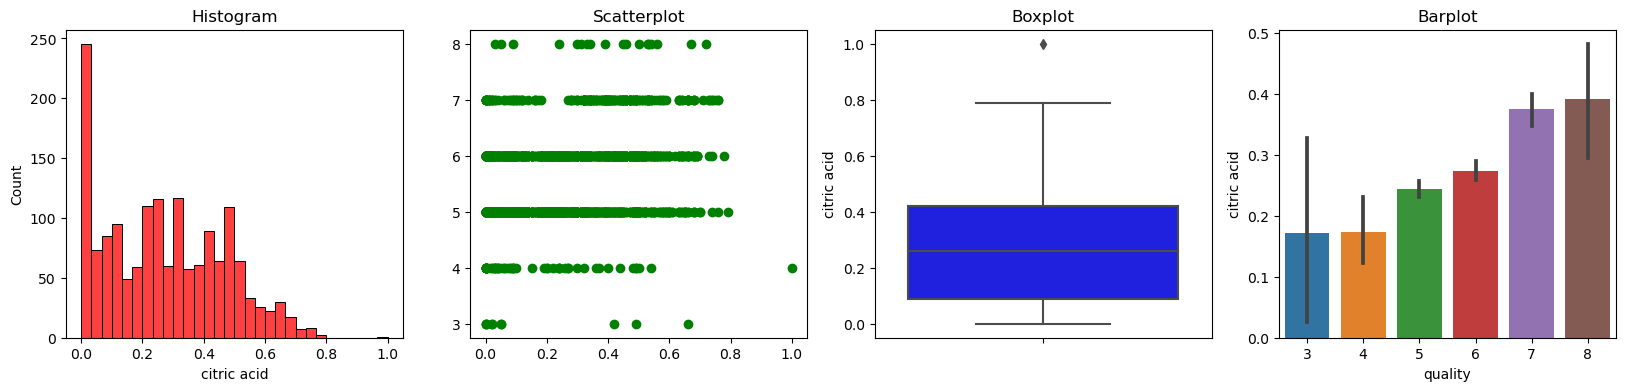

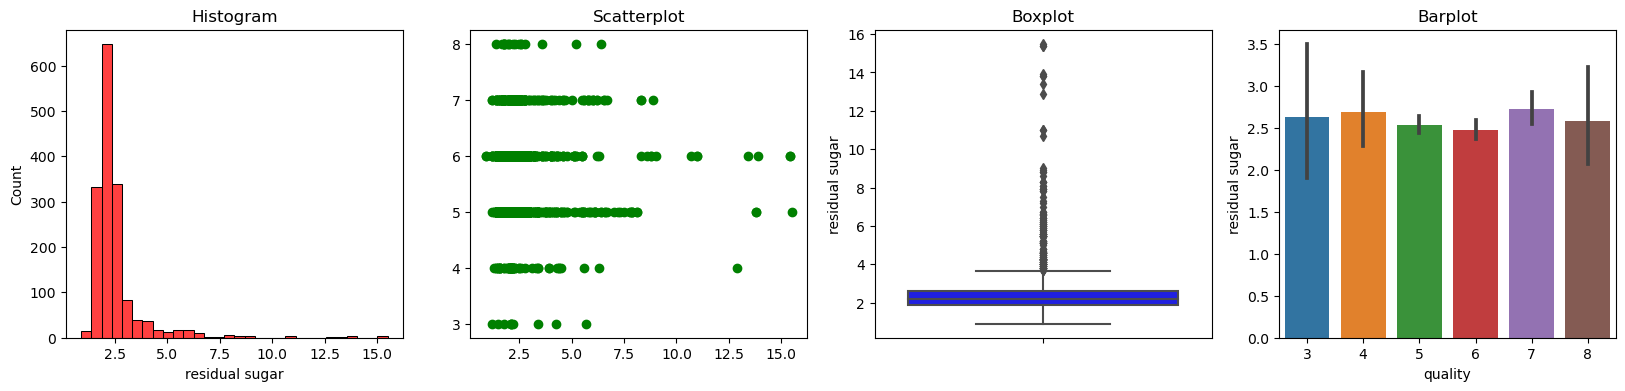

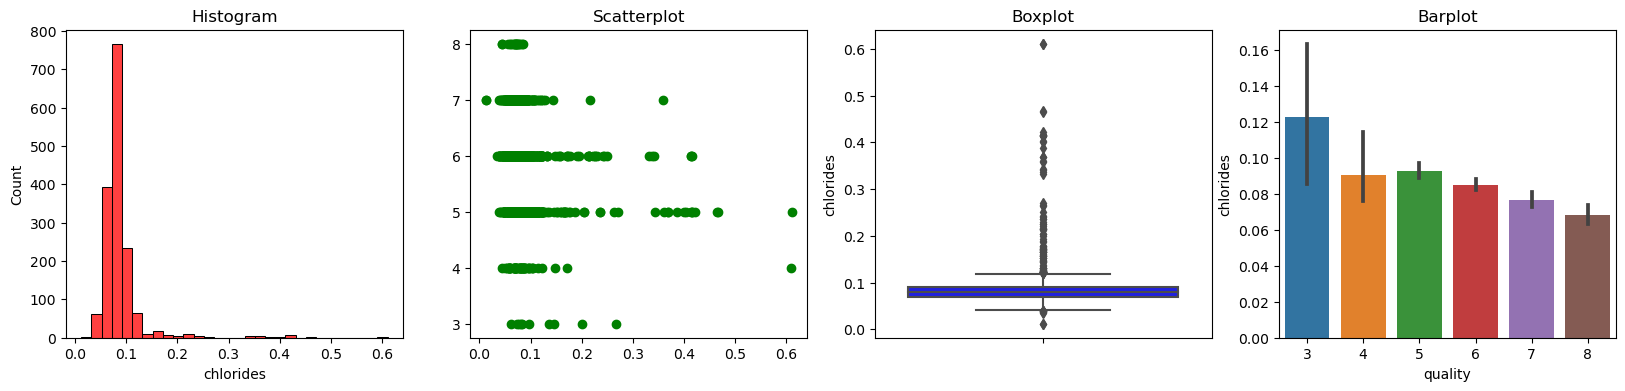

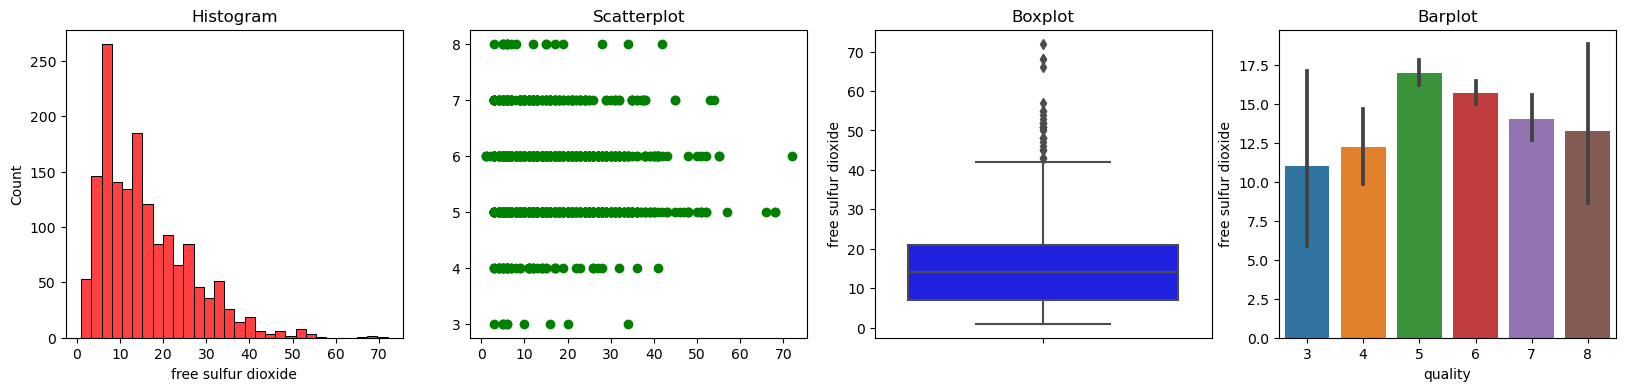

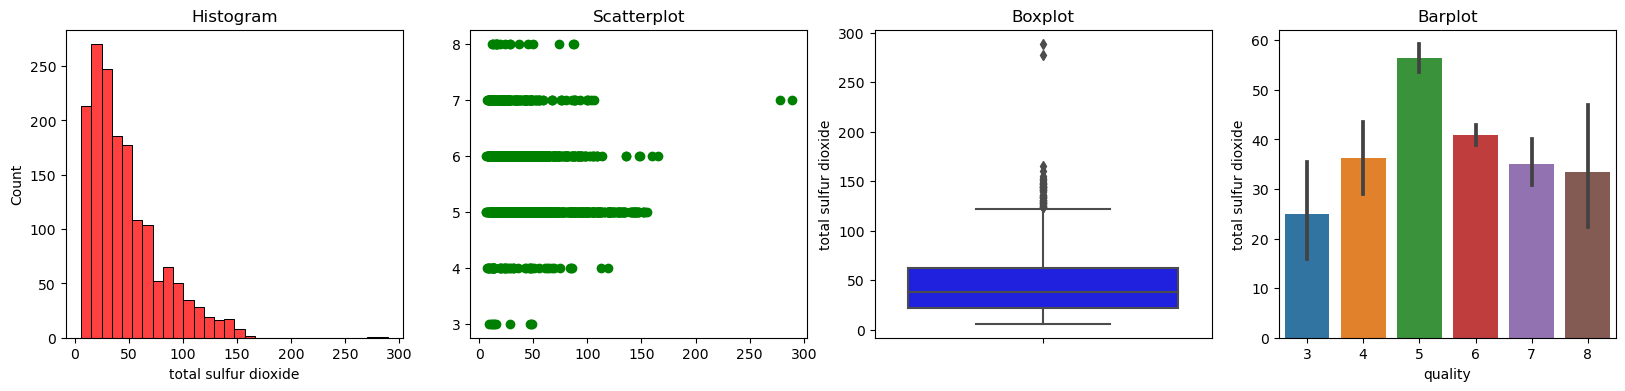

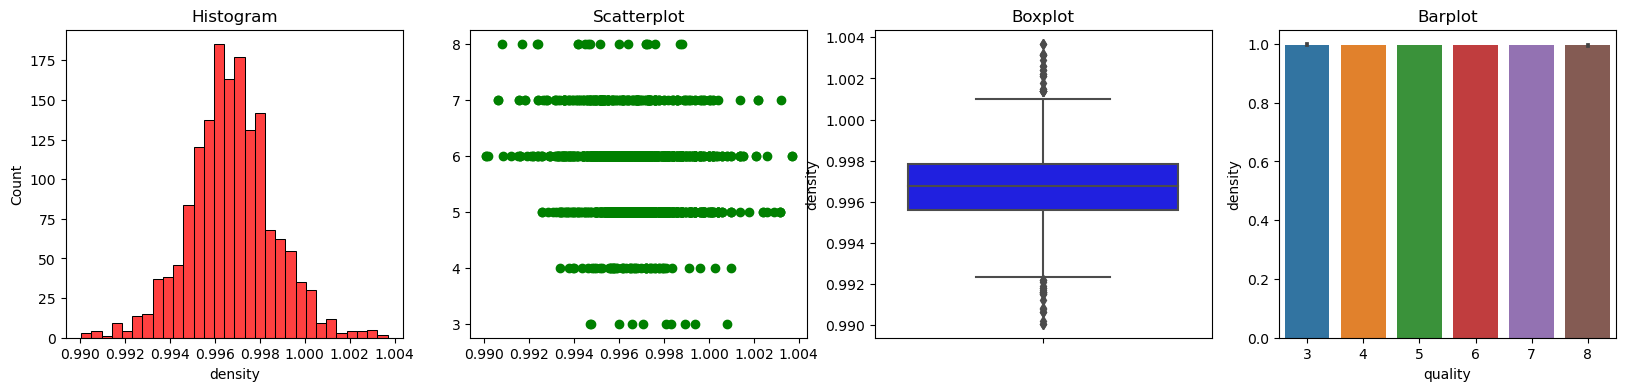

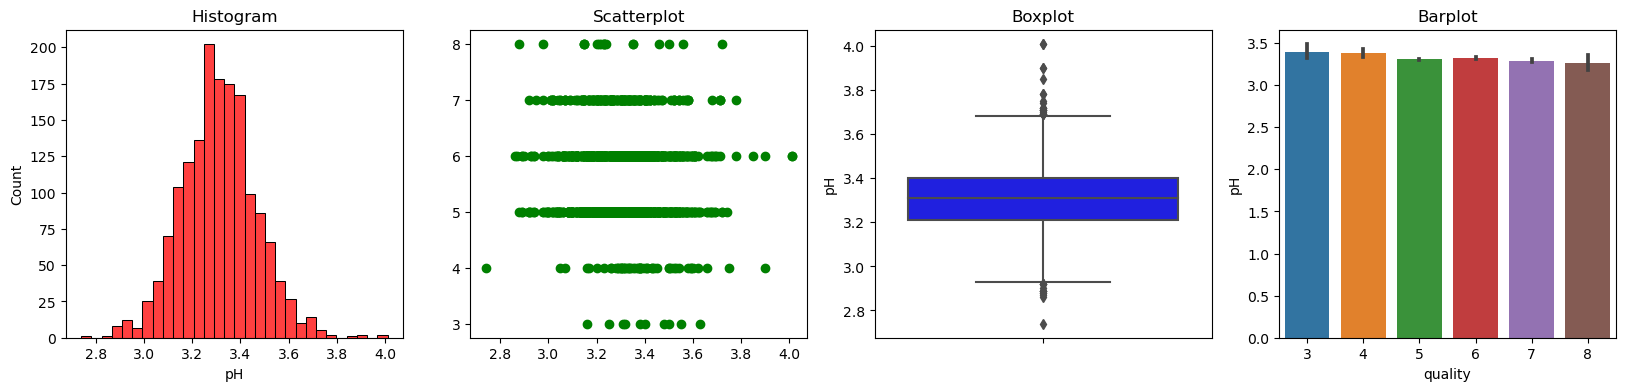

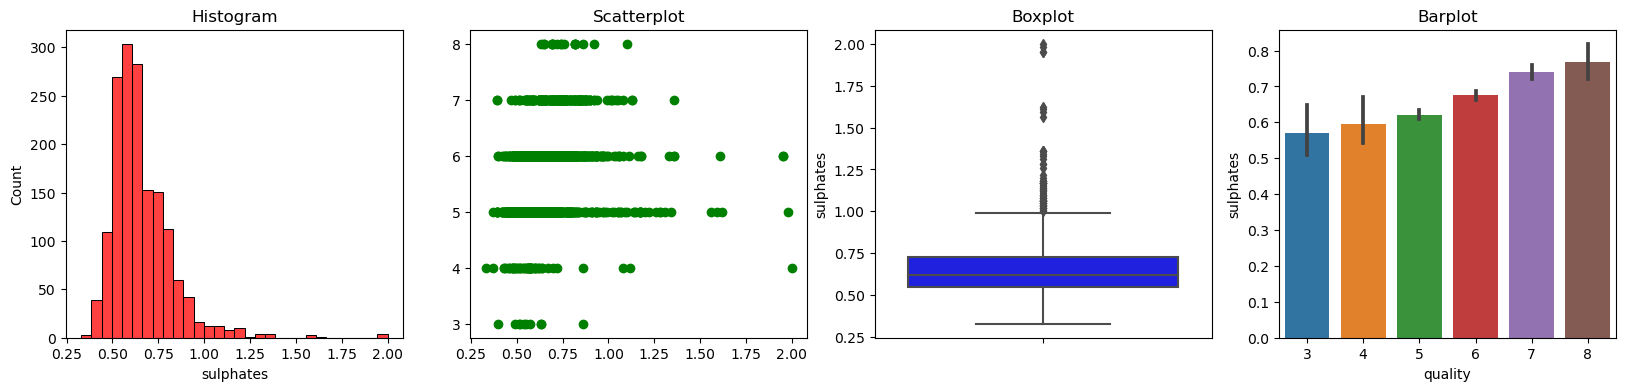

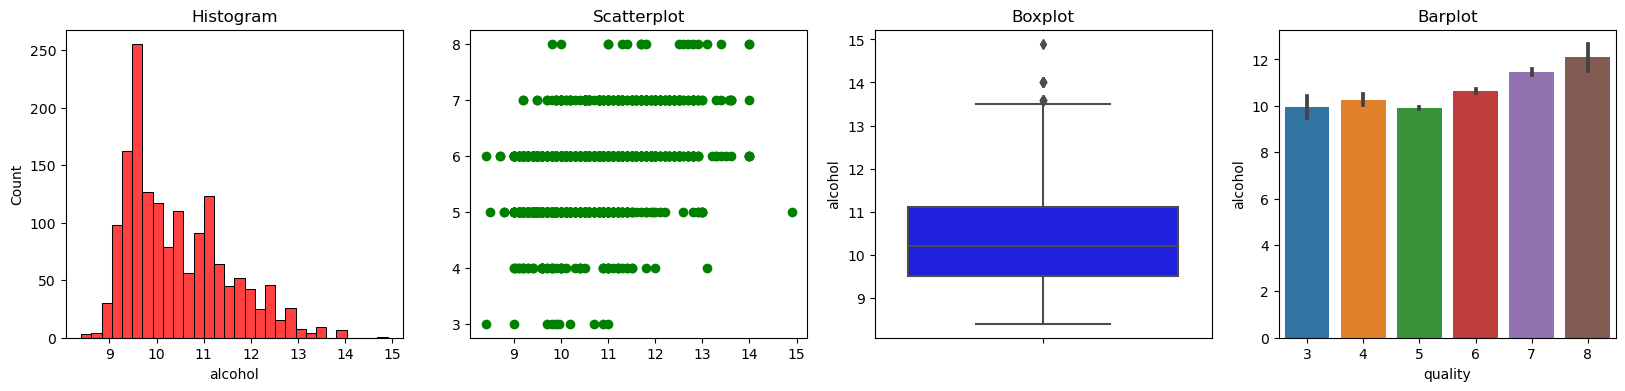

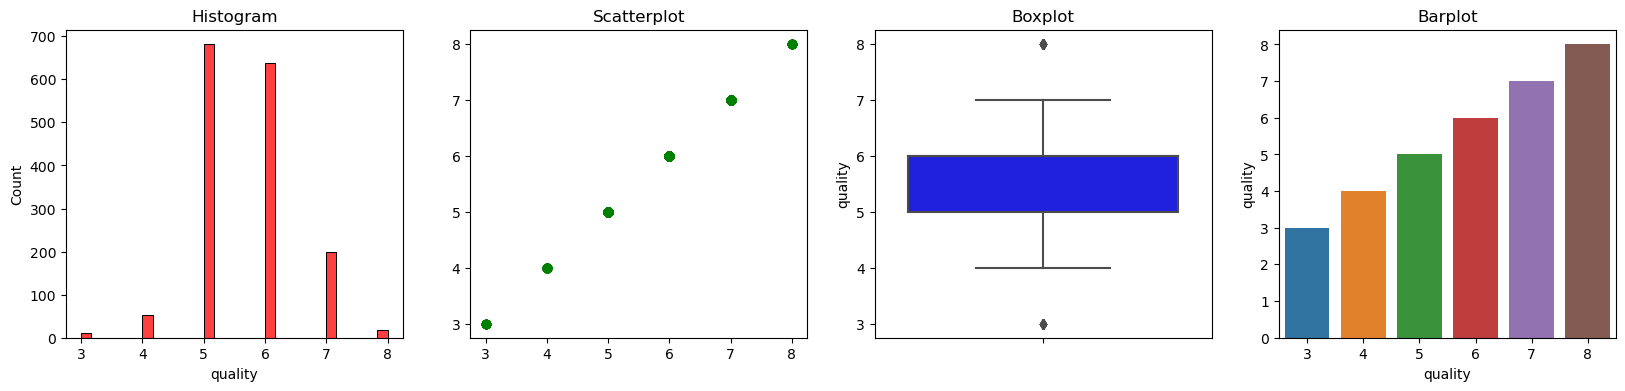

In [10]:
for variable in df:
    diagnostic_plots(df,variable,'quality')

In [11]:
# We can see the skewness of the variables and outliers pretty much in every feature.

# “pH” column appears to be normally distributed.

# Remaining all independent variables are right skewed/positively skewed.

# In our data set except “alcohol” all other features columns shows outliers.

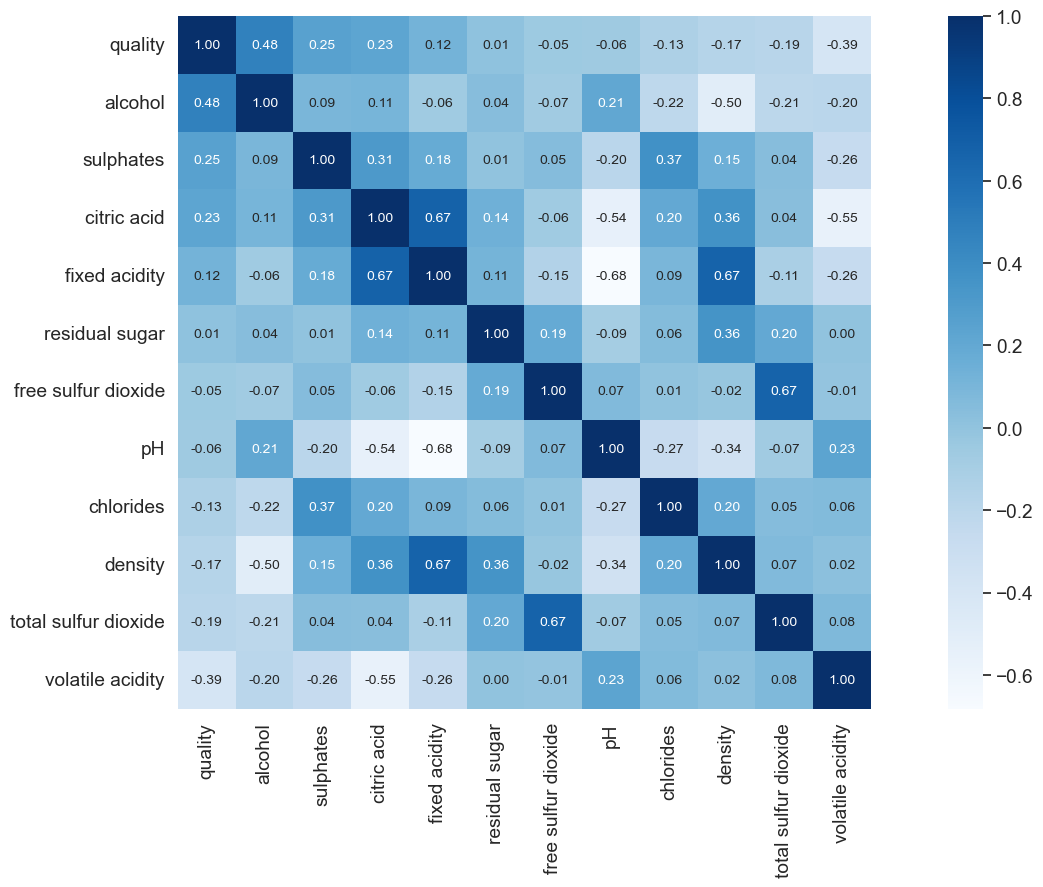

In [12]:
corr = df.corr()
plt.figure(figsize=(20, 9))
k = 12 #number of variables for heatmap
cols = corr.nlargest(k, 'quality')['quality'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap="Blues")
plt.show()

In [13]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

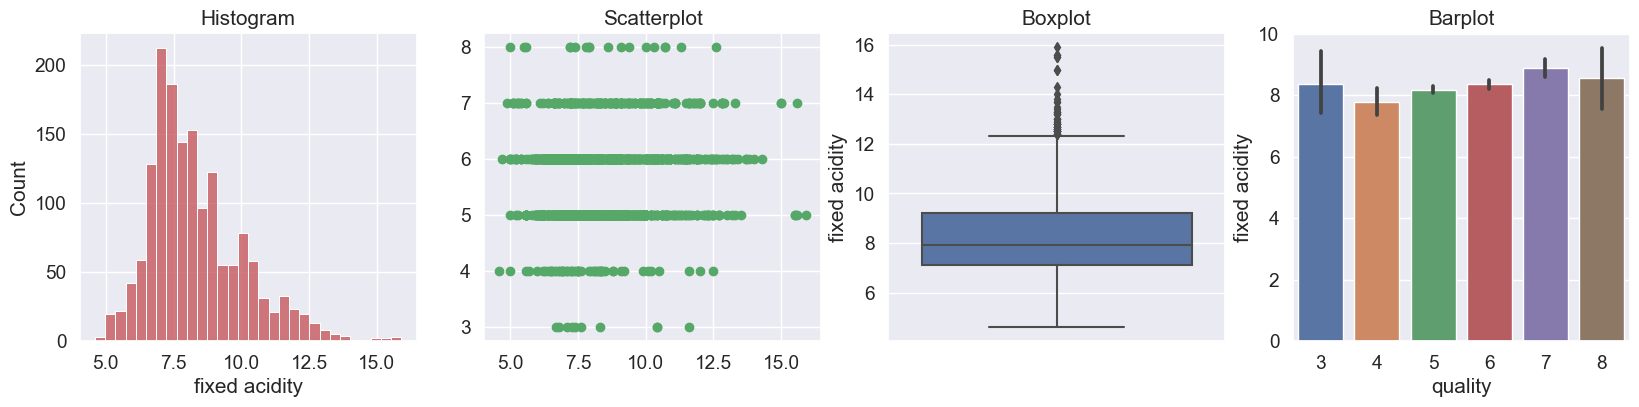

In [15]:
diagnostic_plots(df,'fixed acidity','quality')

In [16]:
df.shape

(1599, 12)

In [20]:
df.iloc[detect_outliers(df,df.columns[:-1])]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
353,13.5,0.530,0.79,4.8,0.120,23.0,77.0,1.00180,3.18,0.77,13.0,5
364,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.0,7
366,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.0,7
374,14.0,0.410,0.63,3.8,0.089,6.0,47.0,1.00140,3.01,0.81,10.8,6
442,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7
538,12.9,0.350,0.49,5.8,0.066,5.0,35.0,1.00140,3.20,0.66,12.0,7
554,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
555,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
557,15.6,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
559,13.0,0.470,0.49,4.3,0.085,6.0,47.0,1.00210,3.30,0.68,12.7,6


In [21]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [22]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
#Splitting train-test sets

x = df.drop("quality", axis=1)
y = pd.DataFrame(df["quality"])

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state =42)

In [26]:
#Applying StandardScaler on X_Train and X_Test to remove the mean and scale each feature/variable to unit variance

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = x.columns)
X_train.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.218332,0.889712,0.192092,0.309726,-0.049642,0.691007,1.042934,1.846696,1.093500,0.458223,1.123177
1,-1.290166,-1.788783,0.652753,-0.805080,-0.455214,2.388473,3.593870,-3.004491,-0.400439,-0.401197,1.408272
2,1.494753,-0.784347,1.011045,-0.526378,0.599272,-0.957960,-0.991742,0.768655,-0.075669,0.515517,-0.587390
3,0.276351,0.861811,-0.063831,-0.665729,-0.009085,0.012020,-0.718427,0.089488,0.054238,-1.088733,-0.967516
4,0.044274,2.814880,-0.626861,2.399985,-0.313264,-0.472970,0.222990,1.199871,0.379008,-0.974144,-0.492358
5,-0.071764,-0.784347,1.113415,-0.178002,0.213979,3.018960,2.622085,0.606948,0.443961,1.890589,-0.587390
6,-1.174128,0.108484,-0.626861,-0.526378,-0.232149,0.982001,-0.354008,-1.958791,0.054238,0.916580,1.123177
7,-0.187802,-0.170525,0.601569,0.031024,-0.130756,-0.375972,-0.019957,0.930361,0.768731,-0.229313,0.267894
8,-0.071764,0.610702,-0.012646,-0.387028,0.132865,-1.054958,0.921460,0.375169,-1.179885,-0.229313,-1.252610
9,1.842868,-1.956188,1.215784,1.006479,0.315372,-1.151956,-0.718427,1.523284,-0.205577,1.776000,-0.302295


In [27]:
X_test = pd.DataFrame(scaler.transform(X_test), columns = x.columns)
X_test.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.361860,0.164286,-0.985153,-0.038651,0.518158,-0.181976,-0.019957,0.175732,-0.465393,-0.000134,-0.777453
1,-0.303841,-0.170525,-0.524492,-0.665729,-0.130756,0.497011,1.680668,-0.417191,0.508915,-1.031438,-0.872484
2,1.378715,0.778108,-0.268569,0.100700,0.376208,0.109019,-0.384376,1.954501,-0.205577,1.833295,-0.492358
3,0.102293,-0.393733,0.192092,-0.212839,-0.211871,1.563989,0.344463,0.660851,0.119192,-0.687670,-0.587390
4,-0.942051,-0.393733,-0.166200,-0.596054,-0.232149,0.206017,-0.384376,-1.064016,0.508915,-0.343902,0.172862
5,-0.651956,-0.672743,0.140908,-0.317352,-0.110478,1.854984,0.769619,0.121830,0.833684,-0.802260,-0.967516
6,-0.361860,0.052682,-0.063831,-0.456703,0.011194,0.691007,3.047241,-0.223144,-0.335485,-0.401197,-0.682421
7,-0.767994,1.391930,-0.985153,-0.387028,0.092308,-0.569968,-0.839901,-0.632800,0.573869,-1.088733,-0.397327
8,-0.071764,-0.784347,0.550384,-0.735404,-0.617442,-0.569968,-0.536218,-0.309387,-0.335485,0.458223,-0.587390
9,-1.464224,0.443296,-0.831599,-0.526378,-0.455214,0.206017,-0.566586,-1.047846,1.548177,-0.000134,0.457957


In [28]:
X_train.shape

(1279, 11)

In [29]:
# Linear Regression:

lr = LinearRegression()
lr.fit(X_train, Y_train).score(X_test, Y_test)

0.40318034127962177

In [30]:
Y_pred = lr.predict(X_test)

In [31]:
print("rmse : ", np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

rmse :  0.624519930798013


In [33]:
# Evaluating the model using mean squared error and R2 score

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print('Mean squared error:', mse)
print('R2 score:', r2)

Mean squared error: 0.390025143963955
R2 score: 0.40318034127962177
